**Rationale** In this assignment, you will practice using logit models to analyze data with binary discrete outcomes.

You will be using the following [datasets](https://drive.google.com/drive/folders/1-oR65kkGk7TIzBtRGXVWhkeU1q7yIc-x?usp=sharing). These are the same datasets from Assignment 4.

1. Orange telecom churn
1. Rent the runway

In [ ]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
from google.colab import drive
drive.mount('drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:

fpath = '/content/drive/MyDrive/A4'
os.listdir(fpath)

['telecom_churn.csv',
 'A4_F2021_Visualization (1)-1.ipynb',
 'renttherunway_final_data.json']

# Problem 1 (5 Points)

Use the rent the runway dataset.

Preprocessing:

1. Replace missing values for "rented_for" column with "unspecified".
1. Replace missing values for "body_type" column with "unspecified".
1. Create a column "fit1" which is 0 everywhere except 1's where the value in the "fit" column == "fit", i.e. tranform the fit column to 0's and 1's, 0 where an item didn't fit and 1's where it did.

Run the following regression specified in the problem below.

In [ ]:
# read in the dataset, call it rent
# take a look at A4 for how to read in the json file
rent = pd.read_json(fpath + "/renttherunway_final_data.json", lines=True)

In [ ]:
rent.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [ ]:
# replace spaces in column names with underscores
# see last 2 assignments if you don't know how to do this
rent.columns = [c.replace(' ', '_') for c in rent.columns]

In [ ]:
# take a preview of the rent dataframe, refresh yourself of what's contained in the data
rent['fit'].value_counts()


fit      142058
small     25779
large     24707
Name: fit, dtype: int64

In [ ]:
rent["fit"].unique()

array(['fit', 'small', 'large'], dtype=object)

In [ ]:
# create the 'fit1' column: 0's where item fits, 1 where it didn't
# if you forgot, go back to A4 to refresh your memory of how to do this
rent["fit1"] = 1
rent.loc[rent.fit == "fit", "fit1"] = 0
rent["fit1"].unique()

array([0, 1])

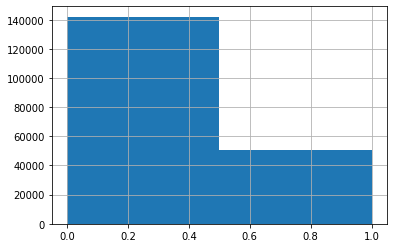

In [ ]:
# create a histogram for the fit1 column
# get a sense of the proportion of items that fit

hist = rent["fit1"].hist(bins=2)

In [ ]:
# Replace missing values of column rented for with "unspecified" using 
# rent.rented_for.fillna('unspecified', inplace = True)

rent.rented_for.fillna('unspecified', inplace = True)

In [ ]:
# check the unique values in rented_for, 
# make sure there are no missing values NaN (i.e. you did the fillna step correctly)
rent["rented_for"].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', 'unspecified', 'party: cocktail'], dtype=object)

In [ ]:
# replace missing values in body type column with "unspecified"
rent.body_type.fillna('unspecified', inplace = True)


In [ ]:
# check the unique values in body_type, 
# make sure there are no missing values NaN (i.e. you did the fillna step correctly)
rent["body_type"].unique()


array(['hourglass', 'straight & narrow', 'unspecified', 'pear',
       'athletic', 'full bust', 'petite', 'apple'], dtype=object)


Run the following regression

$$
Logit(fit1) = \beta_0 + \sum_{Occassion\ne everyday}\beta_{Occassion}+ \sum_{BodyType\ne petite}\beta_{BodyType} + e
$$

e.g. use occassion (rented_for) and body type as explanatory variables, but explciitly use the 'everyday' category as the reference group for occassion and the 'petite' category as the reference group for body type. If you don't know what this means, review the Module 6 notes on categorical variables and dummy coding.

In [ ]:
# estimate the logit model
# Recall from Module 6 notes, you can specify a reference group using C(varname, Treatment(reference = "reference group")),
# where "reference group" here would be "everyday" if the varname is rented_for

rent = rent[rent['body_type']!='petite']
rent = rent[rent['rented_for']!='everyday']

res = smf.ols(formula="fit1 ~ rented_for + body_type", data=rent).fit()

In [ ]:
# print the summary stats table for the logit model

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fit1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.56
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           1.36e-57
Time:                        18:59:41   Log-Likelihood:                -91982.
No. Observations:              155476   AIC:                         1.840e+05
Df Residuals:                  155462   BIC:                         1.841e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.3094      0.008     36.510      0.000       0.293       0.326
rented_for[T.formal affair]       -0.0556      0.006     -9.433      0.000      -0.067      -0.044
rented_for[T.other]               -0.0238      0.007     -3.608      0.000      -0.037      -0.011
rented_for[T.party]               -0.0136      0.006     -2.281      0.023      -0.025      -0.002
rented_for[T.unspecified]         -0.1630      0.155     -1.054      0.292      -0.466       0.140
rented_for[T.vacation]            -0.0033      0.009     -0.361      0.718      -0.021       0.014
rented_for[T.wedding]             -0.0328      0.006     -5.688      0.000      -0.044      -0.021
rented_for[T.work]                -0.0088      0.007     -1.329      0.184      -0.022       0.004
body_type[T.athletic]             -0.0281      0.007     -4.052      0.000      -0.042      -0.014
body_type[T.full bust]            -0.0059      0.008     -0.774      0.439      -0.021       0.009
body_type[T.hourglass]            -0.0227      0.007     -3.310      0.001      -0.036      -0.009
body_type[T.pear]                 -0.0127      0.007     -1.754      0.079      -0.027       0.001
body_type[T.straight & narrow]    -0.0308      0.008     -4.052      0.000      -0.046      -0.016
body_type[T.unspecified]          -0.0294      0.008     -3.877      0.000      -0.044      -0.015
==============================================================================
Omnibus:                    33022.167   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35350.611
Skew:                           1.102   Prob(JB):                         0.00
Kurtosis:                       2.224   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Answer these questions**

Based on the logit results table above, answer the following:

1. Which *body types*, if any, have statistically *better* likelihood of fitting compared to those with "petite" body types? List them below.
    * full bust and pear

1. Which *body types*, if any, have statistically *worse* likelihood of fitting compared to those with "petite" body types? List them below.
    * athletic, streight and narrow and unspecified

1. Which *occassions*, if any, have statistically *better* likelihood of fitting compared to "everyday" occassion? List them below.
    * unspecified, vacation, work

1. Which *occassions*, if any, have statistically *worse* likelihood of fitting compared to "everyday" occassion? List them below.
    * formal affair, other, party, wedding

1. Why can't you directly interpret the quantity of these coefficients in an intuitive manner (can only interpret their signs)? What do you need to do to interpret the independent variables' impact on the *probability* of fit?
    *  Because we multilpe variables affecting the liklihood. we cannot decide by chosing one.


*Note that statistically better/worse requires you to interpret the p-values for statistical significance, i.e. check where there is enough evidence to reject the null that there is no difference (coefficient = 0), in addition to the sign of the coefficient.

In [ ]:
# calculate the marginal effects table for the logit model
mar = res.resid


# print the marginal effects summary table below
mar.describe()


count    1.554760e+05
mean     1.463107e-16
std      4.372194e-01
min     -3.094331e-01
25%     -2.677644e-01
50%     -2.485571e-01
75%      7.052149e-01
max      8.662606e-01
dtype: float64

**Answer these questions**

1. Which occassion has the highest, statistically significant, average marginal effect on fit? Interpret the marginal effect.
    
    * vacation with p-value of 0.718 have the highest effect on fit.

1. Which body type has the lowest, statistically signifiant, average marginal effect on fit? Interpret the marginal effect.
    
    *  straight & narrow and unspecified with p-value of 0 have the lowest effect on fit


# Problem 2 (5+1 points)

Use the orange telecom churn data to estimate a logit model of customer churn. Recall here that Churn means that the customer left their contract for the cell phone plan. These plans are from the 2010's when phone plans had potentially different rates for days and nights.

1. Convert the "Churn" variable to integer type, e.g. `df.Churn = df.Churn.astype(int)`
1. List at least 3 variables that you think might be predictive of churn. Give a brief explanation for each variable's relationship with potential churn. You may want to avoid using categorical variables with **too many** unique values, such as area code, as it makes the model difficult to interpret and may take too long to estimate / may not run. You may also want to create composite variables, a variable derived from other variables in the dataframe, such as average rate paid (charge/ minutes). You may also want to include log transformations or quadratic components if you believe there may be nonlinearities such as diminishing returns, for example. (up to 1 bonus point for creativity here)
1. Specify and estimate a model of churn.
1. Obtain the marginal effects for the model you've estimated. Interpret these results.
1. Given your model results, what is a suggestion to management about potential interventions to deter churn?

In [ ]:
# read in the dataset
orange = pd.read_csv(fpath + "/telecom_churn.csv")

In [ ]:
# replace column name spaces with underscores
orange.columns = [c.replace(' ', '_') for c in orange.columns]

In [ ]:
# preview the dataset to get a sense of its contents
orange.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Convert column "Churn" to integer type
orange.Churn = orange.Churn.astype(int)


In [ ]:
# use scratch cells here to explore the dataset (graphically) to come up with variables to include in the model

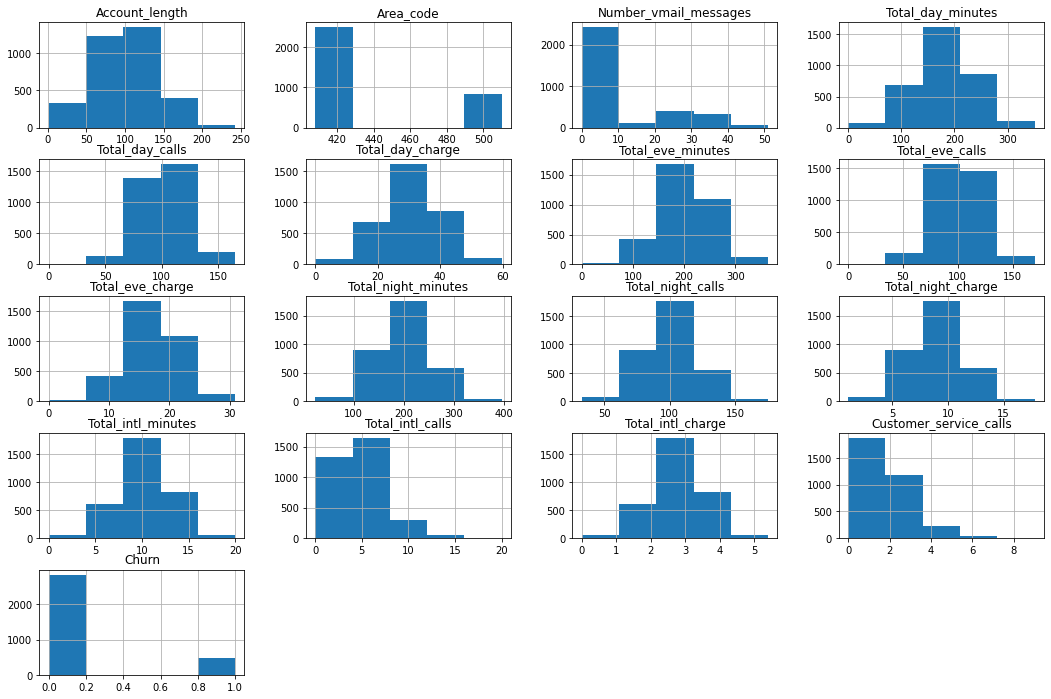

In [ ]:
hist = orange.hist(bins=5, figsize=[18,12])

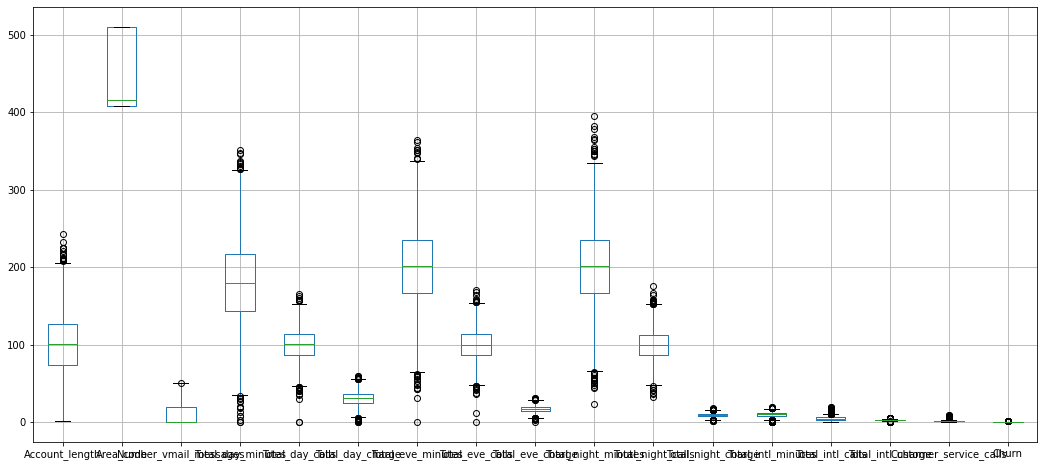

In [ ]:
orange.boxplot( figsize=[18,8])

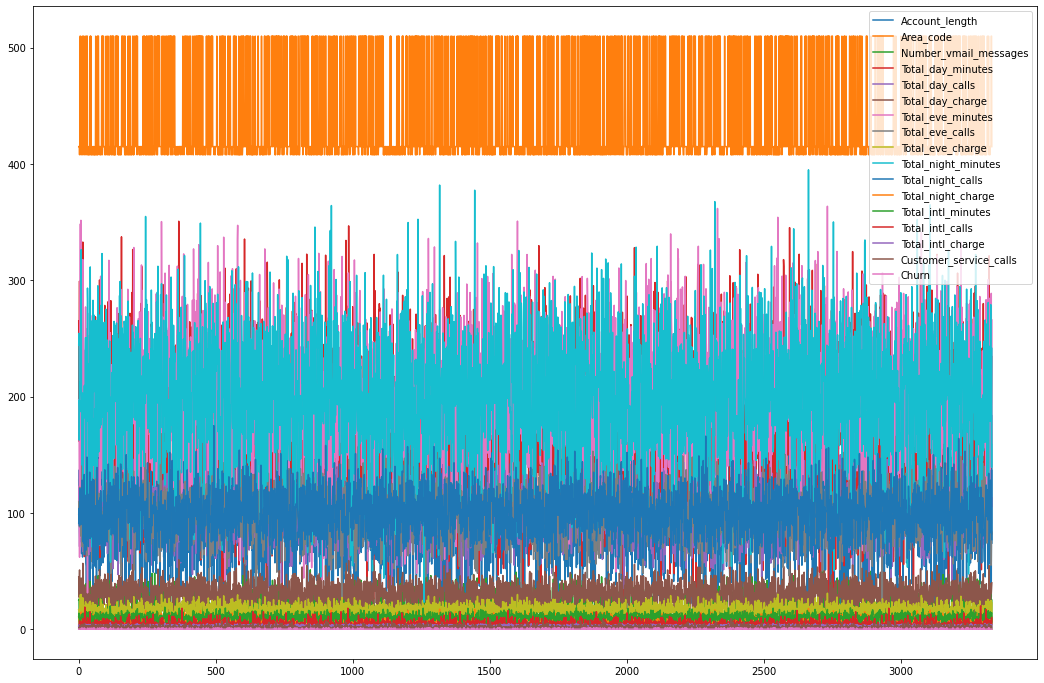

In [ ]:
orange.plot(figsize=[18,12])

**Answer these**

List some (at least 3) explanatory variables from the dataframe, or that you can make using existing variables in the dataframe, that can influence churn. For each, give a brief explanation of the potential relationship, and make a prediction about the direction of the prediction (increase or decrease churn).

1. variable here...
    1. explanation here...
    1. prediction here...
1. 
    1. Total_day_minutes
    1. It has a large spread and will change with the churn value
1. 
    1. Area_code
    1. contains only two bars same as churn one is small and one is large it will have a positive co-relation.
1. 
    1. Number_vmail_messages
    1. Have a less spread and will affect less the value of churn 

add as many as you wish 

**Edit this**
Write the regression equation below with the appropriate explanatory variables as posited in your answers above: 

$$
logit(Churn) = \beta_0 + \beta_1 Total Day Minutes = \beta_2 Area Code + \beta_3 Number Vmail Messages+ e
$$

FYI, if you are using a categorical variable with 2 possible outcomes, say International_Plan (yes or no), include it in the regression equation as (baseline is assumed to be no): 
$$
+\beta_{IntlPlan}
$$


If you are using the a categorical variable with many outcomes, say State, include it using: 
$$
+ \sum_{state \ne PA }\beta_{state},
$$
where PA is the baseline reference group. Feel free to change PA to any other reference group, but be sure to do so when you run the regression as well.

In [ ]:
# Esitmate the logit model you've specified above here using statsmodels (smf)

res = smf.ols(formula="Churn ~ Total_day_minutes + Area_code + Number_vmail_messages ", data=orange).fit()


In [ ]:
# print the summary table of your logit model
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     58.68
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           5.82e-37
Time:                        19:29:32   Log-Likelihood:                -1163.5
No. Observations:                3333   AIC:                             2335.
Df Residuals:                    3329   BIC:                             2359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.1029      0.065     -1.584      0.113      -0.230       0.024
Total_day_minutes         0.0013      0.000     12.153      0.000       0.001       0.002
Area_code              6.391e-05      0.000      0.455      0.649      -0.000       0.000
Number_vmail_messages    -0.0023      0.000     -5.321      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1100.514   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2608.419
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                       5.035   Cond. No.                     5.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# obtain the marginal effects
mar = res.resid



In [ ]:
# print the marginal effects summary table here
mar


0      -0.217649
1      -0.078001
2      -0.246643
3      -0.320503
4      -0.144868
          ...   
3328   -0.047720
3329   -0.230322
3330   -0.169649
3331   -0.213438
3332   -0.176913
Length: 3333, dtype: float64

**Answer these prompts**


Interpret at least 3 of the marginal effects from your model below, be sure to reference both the marginal effects and the p-values (and explain their meaning in the context of your specific model). Be sure to discuss whether the results conform to your predictions.* 

1. Total_day_minutes have no marginal effect on churn with p-value = 0
1. Number_vmail_messages have no marginal effect on churn with p-value = 0
1. Area_code have high marginal effect with p-value 0.649


*If you have a lot of coefficients from one categorical variable, just interpret one of those (and then 2 other coefficients not from the same categorical variable). For instance, if you included state in your model, just interpret the coefficient for one state, don't need to interpret all states' coefficients. 

**Answer this**

Based on your model, what recommendations do you have for the telecom service provider?

Answer: Model with selected variable explained only 5% percent variation in the data company needs to focus other factors as well. 